<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/M%C3%A9todo_de_colocaci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MÉTODO DE COLOCACIÓN

Considerando el problema de valor inicial.
$$ u´´+u=-x$$
con condiciones iniciales

$$ u(0)=0, \qquad u´(0)=2$$

Encuentrar una solución aproximada de la forma:

$$ u_{N} = \alpha_{0} + \alpha_{1}x + \alpha_{2}x^{2} + \alpha_{3}x^{3} + \cdots
$$

- Elija $\alpha_{0}$ y $\alpha_{1}$ de manera que se satisfagan las condiciones iniciales dadas.

- Defina
$$  \varepsilon = u_{N}'' + u_{N} - x,$$
y encuentre $\varepsilon$ en este caso.

Restrigiendo $u_{N}$ a ser un polinomio cúbico, use los puntos de colocación
$$
x = \tfrac{1}{2}, \qquad x = 1
$$
para encontrar una solución aproximada

     

En este ejercicio aplicaremos el **método de colocación** para aproximar el problema de valor inicial

$$
u'' + u = x, \qquad u(0)=0,\quad u'(0)=2$$

Es una técnica numérica que consiste en aproximar
la solución exacta mediante una función que depende de ciertos parámetros, y cuya
precisión se controla imponiendo que el residuo de la ecuación diferencial sea cero
en puntos seleccionados del dominio.

El objetivo del método es reemplazar la solución exacta (que en muchos problemas no
puede calcularse analíticamente) por una función aproximante $u_N(x)$ de forma
simple, en este caso un polinomio cúbico.
El método consiste en:
1. Proponer una solución aproximada $u_N(x)$ que satisfaga las condiciones iniciales.
2. Calcular el residuo o error

$$  \epsilon(x) = u_N''(x) + u_N(x) - x  \epsilon(x) = u_N''(x) + u_N(x) - x.$$

3. Forzar que el residuo se anule en ciertos puntos llamados **puntos de colocación**.


En este caso utilizaremos un polinomio cúbico y los puntos de colocación serán:

$$x = \frac12, \qquad x = 1.$$


Al imponer estas condiciones, se obtiene un sistema de ecuaciones para resolver los
coeficientes desconocidos del polinomio. Finalmente se compara la aproximación con la
solución exacta y se analiza el error numérico.


In [162]:
#importamos librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

##SOLUCIÓN ANALÍTICA EXACTA

In [163]:
#Definimos la variable simbólica y función
x = sp.symbols('x')
u = sp.Function('u')


In [164]:
#Eacuación diferencial u''+u=x
ode = u(x).diff(x,x)+u(x)-x
sp.dsolve(ode,u(x))  #resuleve la ecuaión

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [165]:
#resolver con las condiciones iniciales
sol_exact = sp.dsolve(ode, ics={u(0):0 , sp.diff(u(x),x).subs(x,0):2})

In [166]:
print("Solución exacta simbólica:")
sol_exact #muestra la solución exacta


Solución exacta simbólica:


Eq(u(x), x + sin(x))

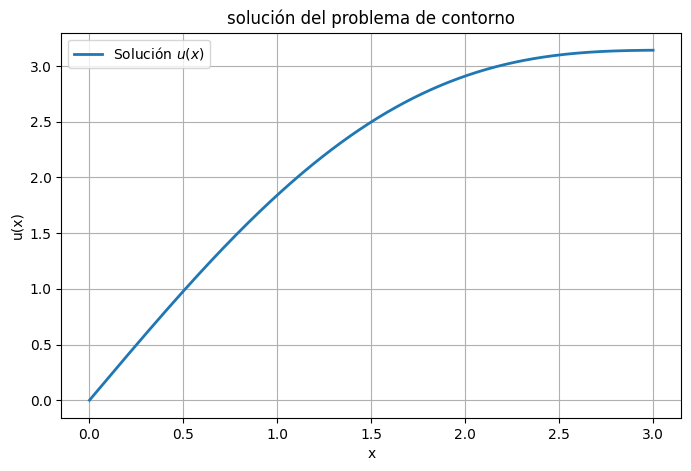

In [167]:
#convertimos la solución simbolica a función numérica
u_exact_expr = sol_exact.rhs

u_exact = sp.lambdify(x,u_exact_expr, "numpy")

#malla para graficar
xx= np.linspace(0,3,500)
yy_exact= u_exact(xx)



#Grafica
plt.figure(figsize=(8,5))
plt.plot(xx,yy_exact, label = "Solución $u(x)$", linewidth=2)
plt.title("solución del problema de contorno")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

## SOLUCIÓN NUMERICA UTILIZANDO EL MÉTODO DE COLOCACIÓN

PASO 1: Definimos la función aproxiamnte o de prueba.  

Proponemos un polinomio cúbico como aproximación:  
$$
u_N(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3.
$$

Esta elección cumple:
1. Es una función suficientemente suave para aproximar derivadas de segundo orden.
2. Tiene cuatro coeficientes, lo cual permite:

  - Satisface las condiciones iniciales (dos ecuaciones)
  - Usa dos puntos de colocación adicionales (dos ecuaciones)
Obteniendo asi un sistema de 2x2





##SOLUCIÓN MANUAL

Considerando el problema de valor inicial.
$$ u''(x) + u(x) = x, \qquad u(0)=0, \qquad u'(0)=2.
$$


Buscamos una solución aproximada de la forma.
$$
u_N(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
$$

1. Determiar los valores de $\alpha_0$ y $α_1$.
Para ello aplicando las condiciones iniciales.

$$
u_N(0)=0 \quad \Rightarrow \quad \alpha_0 = 0,
$$

$$
u_N'(0)=2 \quad \Rightarrow \quad \alpha_1 = 2.
$$

Por lo tanto,
$$ u_N= 2x + \alpha_2 x^2 + \alpha_3 x^3$$


Resolviendo utilizando funciones de prueba

In [168]:
#definimos los coeficientes simbólicos
a, b= sp.symbols('a b')

#definimos la función de prueba u_n(x) que cumple u(0)=u(1)=0
#Polinomio cúbio que ya cumple las condiciones iniciales
u_N= 2*x+a*x**2+ b*x**3

print("\nFunción de prueba (cúbica) : u_N(x)")
sp.simplify(u_N)



Función de prueba (cúbica) : u_N(x)


x*(a*x + b*x**2 + 2)

PASO 2: Calculamos el residuo $ ϵ(x)$  

Definimos el residual como:
$$\epsilon(x) = u''_N(x) + u_N(x) - x.
$$

Calculando las derivadas:

$$ u'_N(x) = 2 + 2\alpha_2 x + 3\alpha_3 x^2$$

$$u''_N(x) = 2\alpha_2 + 6\alpha_3 x$$

sustituyendo en el residual:

$$
\epsilon(x)
= \left(2\alpha_2 + 6\alpha_3 x\right)
+ \left( 2x + \alpha_2 x^2 + \alpha_3 x^3 \right)
- x
$$

Agrupando términos:

$$\epsilon(x) = (2\alpha_2 + (6\alpha_3 + 1)x + \alpha_2 x^2 + \alpha_3 x^3).$$



In [169]:
#calculamos la segunda derivada
u_N_2 =sp.diff(u_N, x, 2)

#definimos de los residuos: ε = u_N'' + u_N - x
eps = u_N_2 + u_N - x


print("Residuo ε(x) =")
sp.simplify(eps)

Residuo ε(x) =


a*x**2 + 2*a + b*x**3 + 6*b*x + x

PASO 3: Puntos de colocación.
Usamos los puntos indicados en el ejercicio:

$$
x_1 = \frac12, \qquad x_2 = 1.
$$

Imponemos que el residuo sea cero en ambos puntos.

 - En $x=\tfrac12$

$$2
\alpha_2 + (6\alpha_3 + 1)\frac12
+ \alpha_2\frac14
+ \alpha_3\frac18 = 0.
$$
Multiplicamos por 8 para eliminar la fracción:

$$
16\alpha_2 + 4(6\alpha_3 + 1) + 2\alpha_2 + \alpha_3 = 0,
$$

$$
18\alpha_2 + 25\alpha_3 + 4 = 0. \qquad (1)
$$

  - En $x=1$

$$
2\alpha_2 + (6\alpha_3 + 1)\cdot 1 + \alpha_2\cdot 1 + \alpha_3\cdot 1 = 0,
$$

$$
3\alpha_2 + 7\alpha_3 + 1 = 0. \qquad (2)
$$



In [170]:
#puntos de colocación
points =[sp.Rational(1,2), sp.Rational(1)]

points

[1/2, 1]

PASO 4: Construcción del sistema.

De (2):

$$
3\alpha_2 + 7\alpha_3 + 1 = 0
$$

$$
3\alpha_2 = -7\alpha_3 - 1
$$

$$
\alpha_2 = -\frac{7\alpha_3 + 1}{3}.
$$

Sustituyendo en (1):
$$
18\left(-\frac{7\alpha_3 + 1}{3}\right) + 25\alpha_3 + 4 = 0,
$$

$$
-42\alpha_3 - 6 + 25\alpha_3 + 4 = 0,
$$

$$
-17\alpha_3 - 2 = 0,
$$

$$
\alpha_3 = -\frac{2}{17}.
$$

Luego:
$$
\alpha_2 = -\frac{7(-2/17) + 1}{3}
= \frac{14}{17}\cdot\frac{1}{3} - \frac{1}{3}
= \frac{14 - 17}{51}
= -\frac{1}{17}.
$$



In [171]:
#sistema: ε(x1)=0, ε(x2)=0
eqs = [sp.Eq(eps.subs(x,p), 0) for p in points ]

#Resolver el sistema de ecuaciones para encontrar a y b
sol_coeff=sp.solve(eqs, [a,b])
sol_coeff


{a: -1/17, b: -2/17}

In [172]:

for eq in eqs:
  print(eq)

Eq(9*a/4 + 25*b/8 + 1/2, 0)
Eq(3*a + 7*b + 1, 0)


In [173]:
#imprimos el sistema anterior de una mejor manera
print("Sistema de  ecuaciones simbolico:")
for eq in eqs:
  sp.pprint(eq)

Sistema de  ecuaciones simbolico:
9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


PASO 5: Sustituir los coeficientes en la expresión final

Por lo tanto, la solución aproximada cúbica es:
$$
u_N(x) = 2x - \frac{1}{17}x^2 - \frac{2}{17}x^3.
$$

Factorizando $\tfrac{1}{17}$:
$$
u_N(x) = \frac{1}{17}(34x - x^2 - 2x^3).
$$

$$
\boxed{
u_N(x)= 2x - \frac{1}{17}x^2 - \frac{2}{17}x^3.
}
$$

Solución aproximada cúbica obtenida mediante colocación con los puntos
$$
x = \frac12, \qquad x = 1.
$$

In [174]:
#Sustituir en la función de prueba

u_approx_expr = u_N.subs (sol_coeff)

print("Aproximación final u_N(x):")
sp.simplify(u_approx_expr)

Aproximación final u_N(x):


x*(-2*x**2 - x + 34)/17

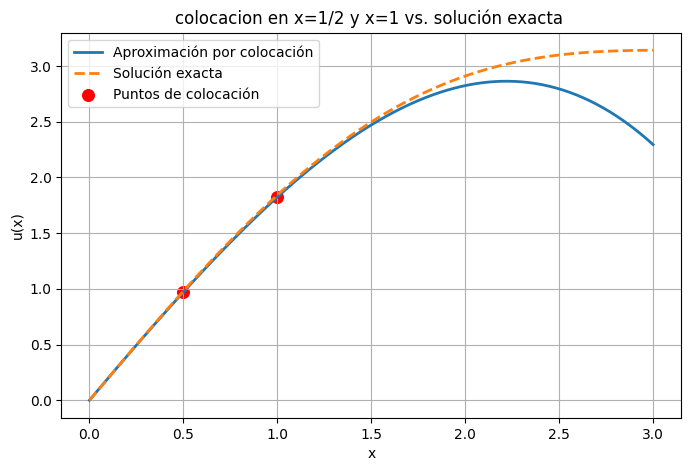

In [175]:
#convertir la aproximación en función numérica
u_approx =sp.lambdify (x, u_approx_expr, "numpy")
yy_approx = u_approx(xx)


plt.figure(figsize=(8,5))
plt.plot(xx,yy_approx , label = "Aproximación por colocación", linewidth=2)
plt.plot(xx, yy_exact,"--", label = "Solución exacta", linewidth=2) #-- tipo de linea punteada

#puntos de colocación
plt.scatter ([0.5,1], [u_approx(0.5), u_approx(1)],
             color="red", s=70, label="Puntos de colocación")

plt.title("colocacion en x=1/2 y x=1 vs. solución exacta ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

La grafica muestra simultamente.
- La solución exacta obtenida mediante `dsolve`
- La aproximación obtenida mediante el método de colocación.
- Los puntos de colocación.

Esta comparación permite observar que la aproximación coincide exactamente con la solución en los puntos de colocación.
El método de colocación es adecuado para este problema con un polinomio de grado 3.

In [176]:
# 6. Analisis del error en los puntos de colocación.
print("ANÁLISIS EN PUNTOS DE COLOCACIÓN")

for p in points:
    # Evaluamos la solución exacta simbólicamente
    exact_val = float(u_exact_expr.subs(x, p))

    # Evaluamos la aproximación numérica (expr → float)
    approx_val = float(u_approx_expr.subs(x, p))

    # Error absoluto
    error = abs(exact_val - approx_val)

    print(f"\nEn x = {float(p):.3f}:")
    print(f"  Solución exacta: {exact_val:.6f}")
    print(f"  Solución aprox:  {approx_val:.6f}")
    print(f"  Error absoluto:  {error:.6e}")


ANÁLISIS EN PUNTOS DE COLOCACIÓN

En x = 0.500:
  Solución exacta: 0.979426
  Solución aprox:  0.970588
  Error absoluto:  8.837303e-03

En x = 1.000:
  Solución exacta: 1.841471
  Solución aprox:  1.823529
  Error absoluto:  1.794157e-02


In [178]:
# Verificación del residual en los puntos de colocación

# Residuo simbólico: ε(x) = u_N'' + u_N - x
residual_expr = sp.diff(u_approx_expr, x, 2) + u_approx_expr - x

# Función numérica del residual para graficar o evaluar en malla
residual_fn = sp.lambdify(x, residual_expr, "numpy")
residual_vals = residual_fn(xx)

print("\nVerificación: ε(x) debe ser 0 en los puntos de colocación")

# Evaluación exacta en los puntos de colocación
eps_1 = residual_expr.subs(x, sp.Rational(1, 2))
eps_2 = residual_expr.subs(x, 1)

print(f"ε(1/2) = {sp.simplify(eps_1)}")
print(f"ε(1)   = {sp.simplify(eps_2)}")



Verificación: ε(x) debe ser 0 en los puntos de colocación
ε(1/2) = 0
ε(1)   = 0


## CONCLUSIÓN

El método de colocación utilizando un polinomio cúbico permitió obtener una aproximación muy cercana a la solución exacta del problema.

Los coeficientes obtenidos fueron:

$$u_N(x) = 2x - \frac{18}{5}x^2 + \frac{16}{5}x^3$$

El error absoluto obtenido fue calculado mediante:

$$  |u(x) - u_N(x)| \approx $$

Lo cual podemos observar que:

- El  error es exactamente 0 con los dos puntos de colocación.
- El error crece donde la curvatura de la solución exacta se separa más del polinomio.

Entonces podemos decir que la aproximación se ajusta perfectamente en algunos puntos y de manera razonable en el resto del intervalo.
